In [9]:
# -*- coding: UTF-8 -*-
import numpy as np
import operator

"""
函数说明:创建数据集

Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
Modify:
    2017-07-13
"""
def createDataSet():
    #四组二维特征
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    #四组特征的标签
    labels = ['爱情片','爱情片','动作片','动作片']
    return group, labels

"""
函数说明:kNN算法,分类器

Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果

Modify:
    2017-07-13
"""
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #sum()所有元素相加，sum(0)列相加，sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方，计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

if __name__ == '__main__':
    #创建数据集
    group, labels = createDataSet()
    #测试集
    test = [101,20]
    #kNN分类
    test_class = classify0(test, group, labels, 3)
    #打印分类结果
    print(test_class)

动作片


0
0
0
1
1
0


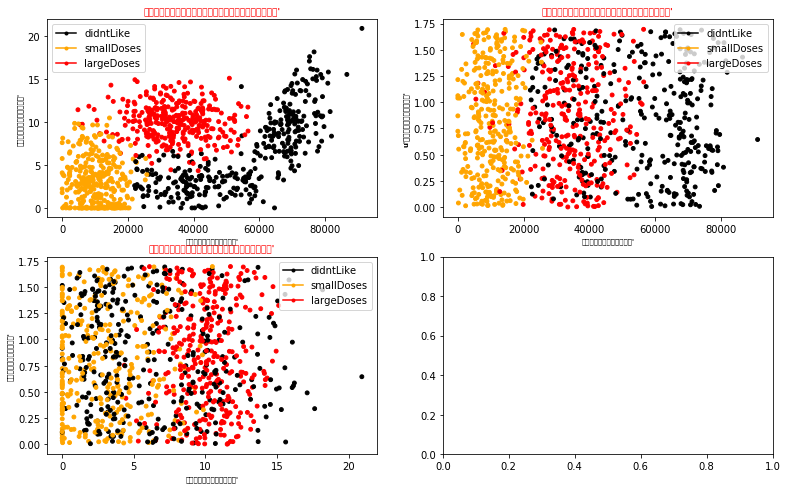

In [48]:
# -*- coding: UTF-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def file2matrix(filename):
    """
    函数说明: 打开并解析文件, 对数据进行分类： 1代表不喜欢, 2代表魅力一般, 3代表极具魅力
    
   Parameters:
        filename - 文件名
    
    Returns:
        returnMat - 特征矩阵
        classLabelVector - 分类Label向量
    """
    # 打开文件
    with open(filename, 'r') as fr:
        # 读取文件内容
        arrayOLines = fr.readlines()
    # 得到文件行数
    numberOfLines = len(arrayOLines)
    # 返回的numpy矩阵, 解析完成的数据：numberOfLines行, 3列
    returnMat = np.zeros((numberOfLines, 3))
    # 返回分类标签的向量
    classLabelVector = []
    # 行的索引值
    index = 0
    for line in arrayOLines:
        # s,strip(rm), 当rm空时， 默认删除空白符(包括'\','\r', '\t')
        line.strip()
        # 使用s.spilt(str="", num=string, cout(str))将字符串根据'\t’分隔符进行切片
        listFromLine = line.split('\t')
        # 将数据前三列提取出来, 放到returnMat的Numpy矩阵中, 也就是特征矩阵
        returnMat[index,:] = listFromLine[ 0 : 3]
        # 根据文中标记的喜欢程度进行分类， 1代表不喜欢, 2代表魄力一般, 3代表极具魅力
        # listFromLine 在split的时候，会自动在末尾加上一个分隔符
        if listFromLine[-1].strip('\n') == 'didntLike':
            classLabelVector.append('1')
        elif listFromLine[-1].strip('\n') == 'smallDoses':
            classLabelVector.append('2')
        elif listFromLine[-1].strip('\n') == 'largeDoses':
            classLabelVector.append('3')
        index += 1
    return returnMat, classLabelVector


def showdatas(datingDataMat, datingLabels):
    """
    函数说明: 可视化数据
    
    Parameters:
        datingDataMat - 特征矩阵
        datingLabels - 分类Label
    Returns:
        无
    Modify：
        2018-05-16
    """
    # 设置子图和画布大小
    fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(13, 8))
    numberOfLabels = len(datingLabels)
    labelsColors = []
    for i in datingLabels:
        if i == '1': 
            labelsColors.append('black')
        elif i == '2':
            labelsColors.append('orange')
        elif i == '3':
            labelsColors.append('red')
    
    # 创建axs的索引
    r_index = [0, 0, 1]
    c_index = [0, 1, 0]
    s_index = [1, 2, 2]
    labelx_list = ("每年获得的飞行常客里程数'", "每年获得的飞行常客里程数'", "玩视频游戏所消耗的时间比'")
    labely_list = ("玩视频游戏所消耗的时间比'","u'每周消耗的冰淇淋公升数'", "每周消耗的冰淇淋公升数'")
    title_list = ("每年获得的飞行常客里程数与玩游戏视频所消耗的时间比'", "每年获得的飞行常客里程数与每周消费的冰淇淋公升数'", "玩游戏视频所消耗的时间比每周消费的冰淇淋公升数'")
    # 设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.', markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.', markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.', markersize=6, label='largeDoses')
    label_list = [didntLike, smallDoses, largeDoses]
    a = ['a', 'b']
    # 画出散点图
    for index in range(3):
        print(r_index[index])
        print(c_index[index])
        axs[r_index[index]][c_index[index]].scatter(x=datingDataMat[ : , r_index[index]], y=datingDataMat[ : ,s_index[index]], color=labelsColors, s=15)
        axs_title_text = axs[r_index[index]][c_index[index]].set_title(title_list[index])
        axs_xlabel_text = axs[r_index[index]][c_index[index]].set_xlabel(labelx_list[index])
        axs_ylabel_text = axs[r_index[index]][c_index[index]].set_ylabel(labely_list[index])
        plt.setp(axs_title_text, size=9, weight='bold', color='red')   
        plt.setp(axs_xlabel_text, size=7, weight='bold', color='black')
        plt.setp(axs_ylabel_text, size=7, weight='bold', color='black')
        axs[r_index[index]][c_index[index]].legend(handles=label_list)
    plt.show()
        
        #
if __name__ == '__main__':
    # 打开的文件名
    filename = 'datingTestSet.txt'
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)

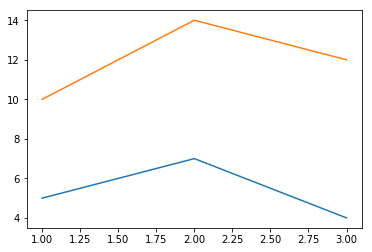

In [2]:
import matplotlib.pyplot as plt
x = [1, 2, 3]
y = [5, 7, 4]
x2 = [1, 2, 3]
y2 = [10, 14, 12]

plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')

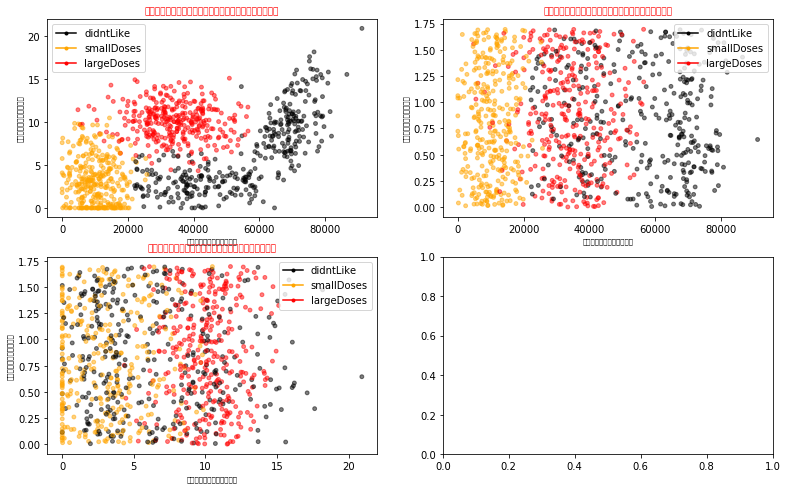

In [50]:
# -*- coding: UTF-8 -*-

from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量

Modify:
    2017-03-24
"""
def file2matrix(filename):
    #打开文件
    fr = open(filename)
    #读取文件所有内容
    arrayOLines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

"""
函数说明:可视化数据

Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
Modify:
    2017-03-24
"""
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
  
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title('每年获得的飞行常客里程数与玩视频游戏所消耗时间占比')
    axs0_xlabel_text = axs[0][0].set_xlabel('每年获得的飞行常客里程数')
    axs0_ylabel_text = axs[0][0].set_ylabel('玩视频游戏所消耗时间占')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数')
    axs1_xlabel_text = axs[0][1].set_xlabel('每年获得的飞行常客里程数')
    axs1_ylabel_text = axs[0][1].set_ylabel('每周消费的冰激淋公升数')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title('玩视频游戏所消耗时间占比与每周消费的冰激淋公升数')
    axs2_xlabel_text = axs[1][0].set_xlabel('玩视频游戏所消耗时间占比')
    axs2_ylabel_text = axs[1][0].set_ylabel('每周消费的冰激淋公升数')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()
    
if __name__ == '__main__':
    # 打开的文件名
    filename = 'datingTestSet.txt'
    # 打开并处理数据
    datingDataMat, datingLabels = file2matrix(filename)
    showdatas(datingDataMat, datingLabels)
    
   